In [147]:
#import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [148]:
#import data files
Austin_listings_path = "Resources/listings_Austin.csv"
listings_path = "Resources/listings_LA.csv"


In [149]:
# Read data into Pandas
Austin_metadata = pd.read_csv(Austin_listings_path)
listings_metadata = pd.read_csv(listings_path)



In [150]:
# Filter by Neighborhood group to only include City of Los Angles
listings_metadata = listings_metadata.loc[listings_metadata["neighbourhood_group"]=="City of Los Angeles",:]

listings_metadata = listings_metadata[["id","name","neighbourhood","room_type","price","minimum_nights","number_of_reviews_ltm","reviews_per_month","availability_365"]]

listings_metadata = listings_metadata.fillna(0)

listings_metadata.head()



,id,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews_ltm,reviews_per_month,availability_365
6,51859630,"Single BR with King size bed, and shared bathroom",San Pedro,Private room,55,2,3,3.00,1
50,611405615742099771,Corner unit 4 bedroom townhome with pool! Must...,Porter Ranch,Entire home/apt,195,365,0,0.00,365
59,598692152685029165,Sheared Space BunkBed #3,Vermont Knolls,Shared room,17,30,0,0.00,261
62,692376005462364487,Guesthouse in Los Ángeles,Northridge,Entire home/apt,175,2,13,2.12,347
63,706447553284084730,Luxurious Villa w/ Lap Pool Outdoor Kitchen,Granada Hills,Entire home/apt,725,2,10,2.94,294


In [151]:
# Filter by Long Term Rental
long_term_rentals = listings_metadata.loc[listings_metadata["minimum_nights"]>=30,:]

# Filter Austin by Long Term Rentals
Austin_LTR = Austin_metadata.loc[Austin_metadata["minimum_nights"]>=30]


In [152]:
# Calculate yearly income for each AirBnb and add to DataFrame
ltr_average_income = long_term_rentals["price"]*long_term_rentals["minimum_nights"]*long_term_rentals["number_of_reviews_ltm"]
long_term_rentals["yearly_income"] = ltr_average_income
long_term_rentals.head()

/var/folders/mr/nzdp38cj3cz3b0gcgyvws4c40000gp/T/ipykernel_2008/2793216851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_term_rentals["yearly_income"] = ltr_average_income


,id,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews_ltm,reviews_per_month,availability_365,yearly_income
50,611405615742099771,Corner unit 4 bedroom townhome with pool! Must...,Porter Ranch,Entire home/apt,195,365,0,0.00,365,0
59,598692152685029165,Sheared Space BunkBed #3,Vermont Knolls,Shared room,17,30,0,0.00,261,0
64,37542116,"Private guesthouse CSUN, Studio City, Hollywood",Granada Hills,Entire home/apt,135,30,0,1.31,365,0
81,759526627157007976,Format: Private room/bathroom Coliving Community,Vermont Square,Private room,55,30,0,0.00,364,0
85,50031523,Ocean/Mountain/Getty View. Walk to beach. Rare...,Pacific Palisades,Entire home/apt,710,30,0,0.15,259,0


In [153]:
# Average income for Long Term AirBnbs
long_term_rentals["yearly_income"].mean()

6764.620800467426

In [154]:
# Filter by short term rental
short_term_rentals = listings_metadata.loc[listings_metadata["minimum_nights"]<30 ,:]

# Filter Austin by Short Term Rentals
Austin_STR = Austin_metadata.loc[Austin_metadata["minimum_nights"]<30]


In [155]:
# Calculate the ratio of long term rentals to short term rentals
ltr_count = long_term_rentals["id"].count()
print(f"The number of long term rental AirBnbs in LA is {ltr_count}")

str_count = short_term_rentals["id"].count()
print(f"The number of short term rental AirBnbs in LA is {str_count}")

print(f"There are around {round(ltr_count/str_count,2)} Long Term AirBnBs for every one Short Term AirBnb in Los Angeles")

The number of long term rental AirBnbs in LA is 17115
The number of short term rental AirBnbs in LA is 5089
There are around 3.36 Long Term AirBnBs for every one Short Term AirBnb in Los Angeles


In [156]:
# Calculate the ratio of long term rentals to short term rentals for Austin Texas
AUS_ltr_count = Austin_LTR["id"].count()
print(f"The number of long term rental AirBnbs in Austin is {AUS_ltr_count}")

AUS_str_count = Austin_STR["id"].count()
print(f"The number of short term rental AirBnbs in Austin is {AUS_str_count}")

print(f"There are around {round(AUS_ltr_count/AUS_str_count,2)} Long Term AirBnBs for every one Short Term AirBnb in Austin Texas")

The number of long term rental AirBnbs in Austin is 1709
The number of short term rental AirBnbs in Austin is 12659
There are around 0.14 Long Term AirBnBs for every one Short Term AirBnb in Austin Texas


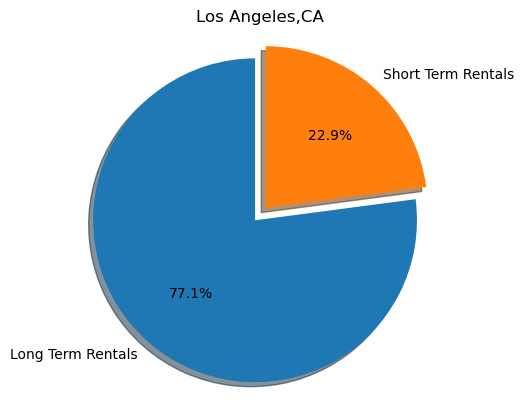

In [157]:
# Convert count of Short Term & Long Tern Rentals to lists to create pie chart
rental_types = ["Long Term Rentals", "Short Term Rentals"]
rental_counts = [ltr_count, str_count]
explode = (.1,0)

# Create pie graph
plt.pie(rental_counts, explode = explode, labels = rental_types, autopct="%1.1f%%", shadow = True, startangle= 90)
plt.axis("equal")
plt.title("Los Angeles,CA")
plt.savefig("cl_output_data/LTR_STR_PieChart.png")
plt.show()

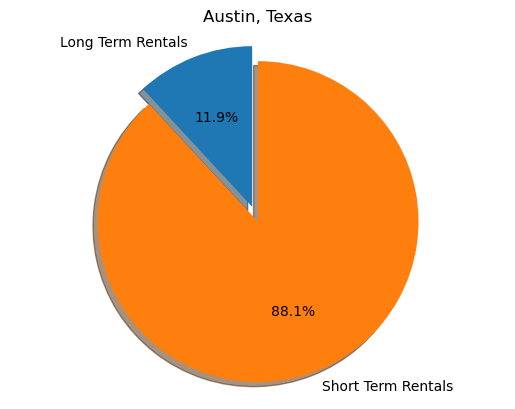

In [158]:
# Convert count of Short Term & Long Tern Rentals to lists to create pie chart (Austin, Texas)
rental_types = ["Long Term Rentals", "Short Term Rentals"]
rental_counts = [AUS_ltr_count, AUS_str_count]
explode = (.1,0)

# Create pie graph
plt.pie(rental_counts, explode = explode, labels = rental_types, autopct="%1.1f%%", shadow = True, startangle= 90)
plt.axis("equal")
plt.title("Austin, Texas")
plt.savefig("cl_output_data/LTR_STR_PieChart_Austin.png")
plt.show()

In [159]:
# Calculate yearly income for each AirBnb and add to DataFrame
str_average_income = short_term_rentals["price"]*short_term_rentals["minimum_nights"]*short_term_rentals["number_of_reviews_ltm"]
short_term_rentals["yearly_income"] = str_average_income
short_term_rentals.head()

/var/folders/mr/nzdp38cj3cz3b0gcgyvws4c40000gp/T/ipykernel_2008/682153596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_term_rentals["yearly_income"] = str_average_income


,id,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews_ltm,reviews_per_month,availability_365,yearly_income
6,51859630,"Single BR with King size bed, and shared bathroom",San Pedro,Private room,55,2,3,3.00,1,330
62,692376005462364487,Guesthouse in Los Ángeles,Northridge,Entire home/apt,175,2,13,2.12,347,4550
63,706447553284084730,Luxurious Villa w/ Lap Pool Outdoor Kitchen,Granada Hills,Entire home/apt,725,2,10,2.94,294,14500
93,25167689,The Valley Guest House,Reseda,Entire home/apt,168,1,34,2.59,148,5712
95,564398776260061956,Stylish 3-Bedroom Charmer - Convenient Location,Encino,Entire home/apt,350,3,3,0.45,342,3150


In [160]:
# data for Short Term AirBnbs
short_term_rentals["yearly_income"].mean()
short_term_rentals["yearly_income"].describe()



count      5089.000000
mean      10962.260562
std       15815.378815
min           0.000000
25%         750.000000
50%        5400.000000
75%       14592.000000
max      179856.000000
Name: yearly_income, dtype: float64

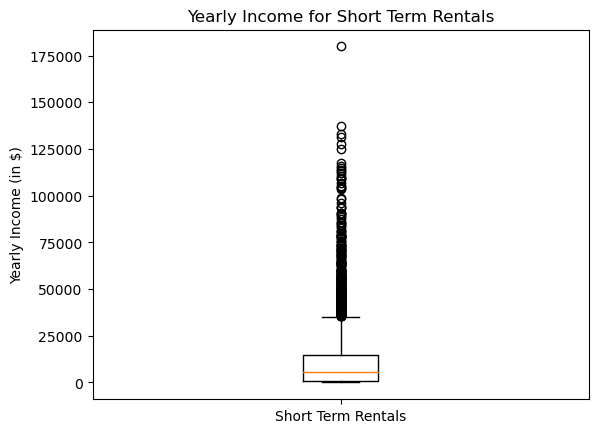

In [161]:
# Plot bar graph of yearly income for short term renters
plt.boxplot(short_term_rentals["yearly_income"])
plt.title("Yearly Income for Short Term Rentals")
plt.ylabel("Yearly Income (in $)")
plt.xticks([1], ["Short Term Rentals"])
plt.savefig("cl_output_data/STR_with_outliers.png")
plt.show()

In [162]:
# Make into list for easier comprehension
str_list = short_term_rentals["yearly_income"]

In [163]:
# filter by only income earners
short_term_rentals = short_term_rentals.loc[short_term_rentals["yearly_income"]>0]
short_term_rentals["yearly_income"].describe()

count      4153.000000
mean      13432.926559
std       16532.294809
min          40.000000
25%        2905.000000
50%        8030.000000
75%       17080.000000
max      179856.000000
Name: yearly_income, dtype: float64

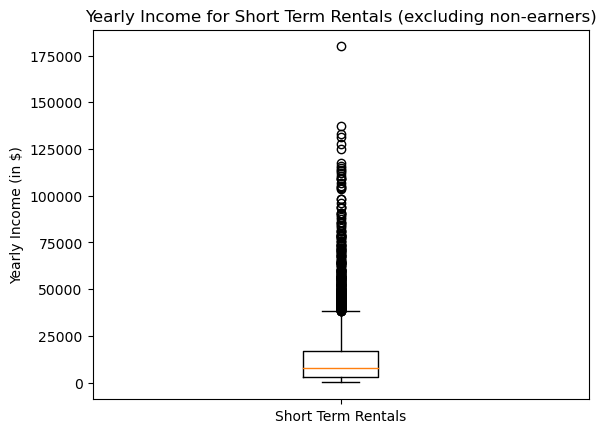

In [164]:
# plot without rentals that earned 0 dollars
plt.boxplot(short_term_rentals["yearly_income"])
plt.title("Yearly Income for Short Term Rentals (excluding non-earners)")
plt.ylabel("Yearly Income (in $)")
plt.xticks([1], ["Short Term Rentals"])
plt.savefig("cl_output_data/STR_no_outliers.png")
plt.show()

In [165]:
# sort LTR by highest grossing yearly income
sorted_ltr = long_term_rentals.sort_values("yearly_income", ascending= False)

# exclude outliers that average more than 1 review per month because it's impossible with long term rentals
sorted_ltr = sorted_ltr.loc[sorted_ltr["reviews_per_month"]<=1,:]
sorted_ltr.head()


,id,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews_ltm,reviews_per_month,availability_365,yearly_income
8757,46812310,MODERN MELROSE LUXURY LIVE WITH THE STARS 5 BDRM,Fairfax,Entire home/apt,1286,30,18,0.88,365,694440
23825,52286969,Lovely 2 bedroom in Resort Style Complex at th...,Canoga Park,Private room,7071,30,2,0.27,188,424260
35436,45903887,4 Bedroom Villa Retreat,Beverly Grove,Entire home/apt,1250,30,11,0.87,365,412500
35327,52382873,"Alfred Modern Villa, Amazing Pool, Waterfall &...",Beverly Grove,Entire home/apt,1366,30,10,0.80,179,409800
1479,51640774,Marbella | Modern Spanish Estate in the Hills,Hollywood Hills West,Entire home/apt,1095,30,12,0.97,228,394200


In [166]:
# Average income for Long Term AirBnbs
sorted_ltr["yearly_income"].mean()
sorted_ltr["yearly_income"].describe()

count     15550.000000
mean       3351.095820
std       14489.365781
min           0.000000
25%           0.000000
50%           0.000000
75%        2413.500000
max      694440.000000
Name: yearly_income, dtype: float64

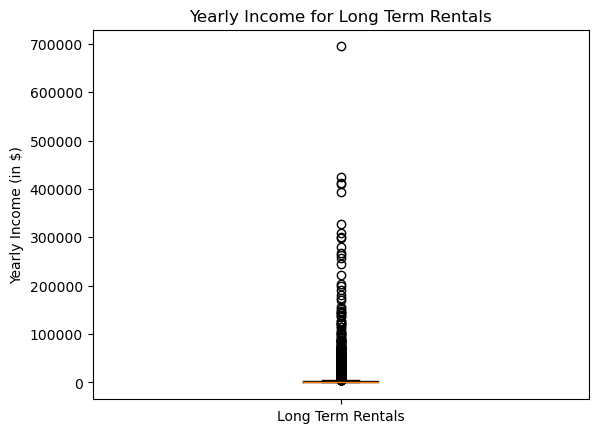

In [167]:
# Plot yearly income of Long Term Rentals
plt.boxplot(sorted_ltr["yearly_income"])
plt.title("Yearly Income for Long Term Rentals")
plt.ylabel("Yearly Income (in $)")
plt.xticks([1], ["Long Term Rentals"])
plt.savefig("cl_output_data/LTR_with_outliers.png")
plt.show()

In [168]:
# filter by upperbound
sorted_ltr = sorted_ltr.loc[sorted_ltr["yearly_income"]>0]
sorted_ltr["yearly_income"].describe()

count      4472.000000
mean      11652.401610
std       25166.884679
min         420.000000
25%        3478.000000
50%        6390.000000
75%       12241.250000
max      694440.000000
Name: yearly_income, dtype: float64

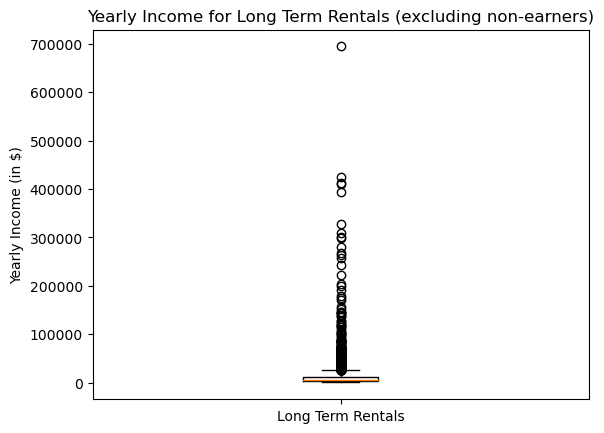

In [169]:
# Plot long term Rentals exlcuing non earners

plt.boxplot(sorted_ltr["yearly_income"])
plt.title("Yearly Income for Long Term Rentals (excluding non-earners)")
plt.ylabel("Yearly Income (in $)")
plt.xticks([1], ["Long Term Rentals"])
plt.savefig("cl_output_data/LTR_no_outliers.png")
plt.show()